In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = pd.read_json("preprocessingDoneRight.json")

E:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


35137


<function matplotlib.pyplot.show(*args, **kw)>

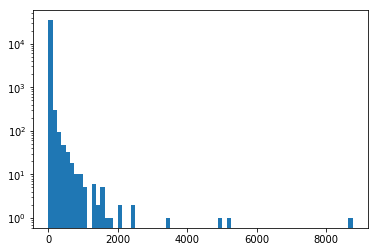

In [2]:
stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

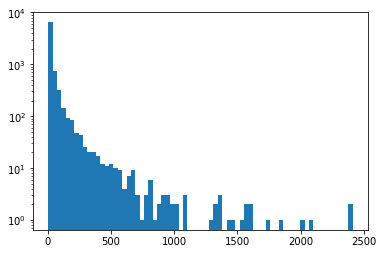

In [3]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 3000]
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [4]:
data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
pd.Series(' '.join(data['m']).split()).value_counts()
sentences = data[data["year"] == 2016]["m"].tolist()


In [5]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['foxnews', 'live', 'members', 'family', 'pm', 'ring', 'new', 'year', 'together', 'make', 'america'], tags=[0]),
 TaggedDocument(words=['happy', 'new', 'year', 'thank'], tags=[1]),
 TaggedDocument(words=['happy', 'new', 'year', 'thank', 'family', 'support'], tags=[2]),
 TaggedDocument(words=['hillary', 'said', 'war', 'lies', 'benghazi', 'allowed', 'wh', 'vote', 'potus'], tags=[3]),
 TaggedDocument(words=['cnn', 'theyre', 'spending', 'millions', 'youre', 'still', 'going', 'win', 'go', 'donald'], tags=[4]),
 TaggedDocument(words=['well', 'year', 'officially', 'begun', 'many', 'stops', 'planned', 'working', 'hard', 'win', 'turn', 'country', 'around'], tags=[5]),
 TaggedDocument(words=['love', 'u', 'family', 'god', 'bless'], tags=[6]),
 TaggedDocument(words=['jodil792', 'standing', 'spreading', 'president', '2016', 'wake', 'sleep', 'praying'], tags=[7]),
 TaggedDocument(words=['im', 'one', 'biggest', 'fans', 'mr', 'cant', 'wait', 'make', 'america', 'never', 'forget', 

In [6]:
tagged_data[0][0]

['foxnews',
 'live',
 'members',
 'family',
 'pm',
 'ring',
 'new',
 'year',
 'together',
 'make',
 'america']

In [7]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=300, min_count=2, epochs=40)

model.build_vocab(tagged_data)


In [8]:
%time 
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


Wall time: 0 ns


In [9]:
model.infer_vector(['mexico',"wall"])


array([-0.0144046 , -0.04383834, -0.00181885, -0.0742899 , -0.0090027 ,
        0.04328441, -0.05746553, -0.07469536,  0.107618  , -0.01442929,
        0.01499295,  0.01781061, -0.02523119,  0.03465974,  0.02046231,
       -0.01979033, -0.08814593,  0.01564411,  0.06482243,  0.01483059,
        0.0489195 ,  0.10550641,  0.03726164, -0.03821263,  0.00191034,
        0.03705617,  0.01907683,  0.03252981, -0.09073351, -0.0431403 ,
       -0.04282598,  0.03923259,  0.0624733 , -0.01798332,  0.04464525,
        0.0175541 ,  0.02262562, -0.01437862, -0.12430235, -0.0429837 ,
        0.09437615,  0.03676575, -0.08860274, -0.08499046,  0.06888752,
        0.0542331 ,  0.03763937,  0.03215559, -0.0661739 ,  0.04642095,
        0.07266023, -0.03542236,  0.01047318,  0.04291871,  0.01747845,
       -0.07170176, -0.08070917,  0.03475635,  0.09302891,  0.03251971,
        0.08788108, -0.08818438, -0.01543605, -0.07594525, -0.16483131,
        0.00922188,  0.04530565,  0.02533076,  0.06510192, -0.08

In [10]:
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])


E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 2024,
         24: 20,
         4: 118,
         178: 1,
         1: 421,
         2: 212,
         48: 4,
         3: 157,
         73: 8,
         121: 3,
         15: 22,
         8: 37,
         12: 40,
         21: 19,
         14: 30,
         5: 73,
         39: 8,
         7: 58,
         16: 22,
         9: 47,
         11: 37,
         26: 13,
         37: 8,
         10: 34,
         6: 70,
         1038: 1,
         51: 7,
         53: 7,
         44: 7,
         57: 2,
         68: 4,
         2257: 1,
         3217: 1,
         33: 10,
         31: 14,
         55: 5,
         110: 7,
         17: 17,
         49: 3,
         13: 23,
         62: 4,
         25: 15,
         41: 11,
         46: 7,
         70: 5,
         18: 25,
         29: 16,
         1441: 1,
         98: 1,
         81: 3,
         147: 1,
         503: 1,
         684: 1,
         1386: 1,
         827: 1,
         1165: 1,
         3020: 1,
         256: 2,
         111: 1,
         2

In [12]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (4208): «rt happy birthday donaldjtrumpjr»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d200,n5,w5,mc2,s0.001,t3):

MOST (4208, 0.9471628069877625): «rt happy birthday donaldjtrumpjr»

SECOND-MOST (4207, 0.927374005317688): «happy birthday donaldjtrumpjr»

MEDIAN (3767, 0.515454888343811): «crooked hillary clinton tops middle east forum islamist money list»

LEAST (1160, -0.7083860635757446): «clinton sanders people rally chicago say must talk people phony politicians»



In [13]:
X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

In [14]:
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk

#stemmed
#0.112 8 cluster were good?
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200


NUM_CLUSTERS=8
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

0.14969653


In [15]:
datak = data[data["year"] == 2016]
datak["labels"] = assigned_clusters
datak

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,foxnews live members family pm ring new year t...,1
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,happy new year thank,2
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,happy new year thank family support,2
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,hillary said war lies benghazi allowed wh vote...,4
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,cnn theyre spending millions youre still going...,5
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,well year officially begun many stops planned ...,2
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,love u family god bless,2
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,jodil792 standing spreading president 2016 wak...,2
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,im one biggest fans mr cant wait make america ...,4
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,huckabee good needs get behind agree,4


In [16]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    words = pd.Series(' '.join(c['m']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

Cluster 0 dimension 519
Cluster 1 dimension 432
Cluster 2 dimension 1014
Cluster 3 dimension 453
Cluster 4 dimension 395
Cluster 5 dimension 462
Cluster 6 dimension 466
Cluster 7 dimension 468


In [17]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 cnn            73
foxnews        72
tonight        56
enjoy          55
megynkelly     46
thank          37
interviewed    36
show           35
people         32
ratings        31
dtype: int64
cluster  1 rt                146
clinton            51
debate             49
president          43
hillaryclinton     42
bigleaguetruth     41
hillary            41
donald             34
draintheswamp      34
maga               34
dtype: int64
cluster  2 thank                    322
trump2016                193
makeamericagreatagain    149
america                  106
make                      88
new                       83
get                       48
people                    45
join                      44
carolina                  39
dtype: int64
cluster  3 thank        102
join          90
trump2016     57
tomorrow      52
big           46
new           41
people        40
crowd         40
rally         37
today         37
dtype: int64
cluster  4 thank                    113
amer